# Users Vs Bots Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d juice0lover/users-vs-bots-classification

Dataset URL: https://www.kaggle.com/datasets/juice0lover/users-vs-bots-classification
License(s): MIT
100%|█████████████████████████████████████████| 110k/110k [00:00<00:00, 154kB/s]
100%|█████████████████████████████████████████| 110k/110k [00:00<00:00, 154kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Users Vs Bots Classification/users-vs-bots-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Users Vs Bots Classification/users-vs-bots-classification.zipn')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('bots_vs_users.csv')

In [6]:
df.head()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown


In [7]:
df.shape

(5874, 60)

In [8]:
df.size

352440

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,5874.0,0.500000,0.500043,0.0,0.000,0.50,1.000,1.00
posts_count,1391.0,18.629044,4.231994,1.0,20.000,20.00,20.000,20.00
avg_likes,1391.0,19.552487,41.954881,0.0,0.400,7.60,26.075,894.90
links_ratio,1391.0,0.156463,0.202730,0.0,0.000,0.10,0.200,1.00
hashtags_ratio,1391.0,0.143918,0.187085,0.0,0.000,0.05,0.200,1.00
avg_keywords,1391.0,7.730661,11.278711,0.0,1.100,3.40,7.850,61.60
avg_text_length,1391.0,544.752035,746.728130,0.0,86.600,267.80,616.850,5841.25
attachments_ratio,1391.0,0.895945,0.170084,0.0,0.850,0.95,1.000,1.00
avg_comments,1391.0,0.610812,2.461709,0.0,0.000,0.00,0.200,64.05
reposts_ratio,1391.0,0.433638,0.397830,0.0,0.050,0.30,0.900,1.00


In [11]:
df.isnull().sum()

has_domain                       0
has_birth_date                   0
has_photo                        0
can_post_on_wall                 0
can_send_message                 0
has_website                      0
gender                           0
has_short_name                   0
has_first_name                   0
has_last_name                    0
access_to_closed_profile         0
is_profile_closed                0
target                           0
has_nickname                     0
has_maiden_name                  0
has_mobile                       0
all_posts_visible                0
audio_available                  0
has_interests                    0
has_books                        0
has_tv                           0
has_quotes                       0
has_about                        0
has_games                        0
has_movies                       0
has_activities                   0
has_music                        0
can_add_as_friend                0
can_invite_to_group 

In [12]:
df.duplicated().sum()

np.int64(2616)

In [13]:
df.nunique()

has_domain                       2
has_birth_date                   2
has_photo                        3
can_post_on_wall                 3
can_send_message                 3
has_website                      3
gender                           4
has_short_name                   2
has_first_name                   2
has_last_name                    3
access_to_closed_profile         3
is_profile_closed                3
target                           2
has_nickname                     3
has_maiden_name                  3
has_mobile                       3
all_posts_visible                3
audio_available                  3
has_interests                    3
has_books                        3
has_tv                           3
has_quotes                       3
has_about                        3
has_games                        3
has_movies                       3
has_activities                   3
has_music                        3
can_add_as_friend                3
can_invite_to_group 

## Data Visualization

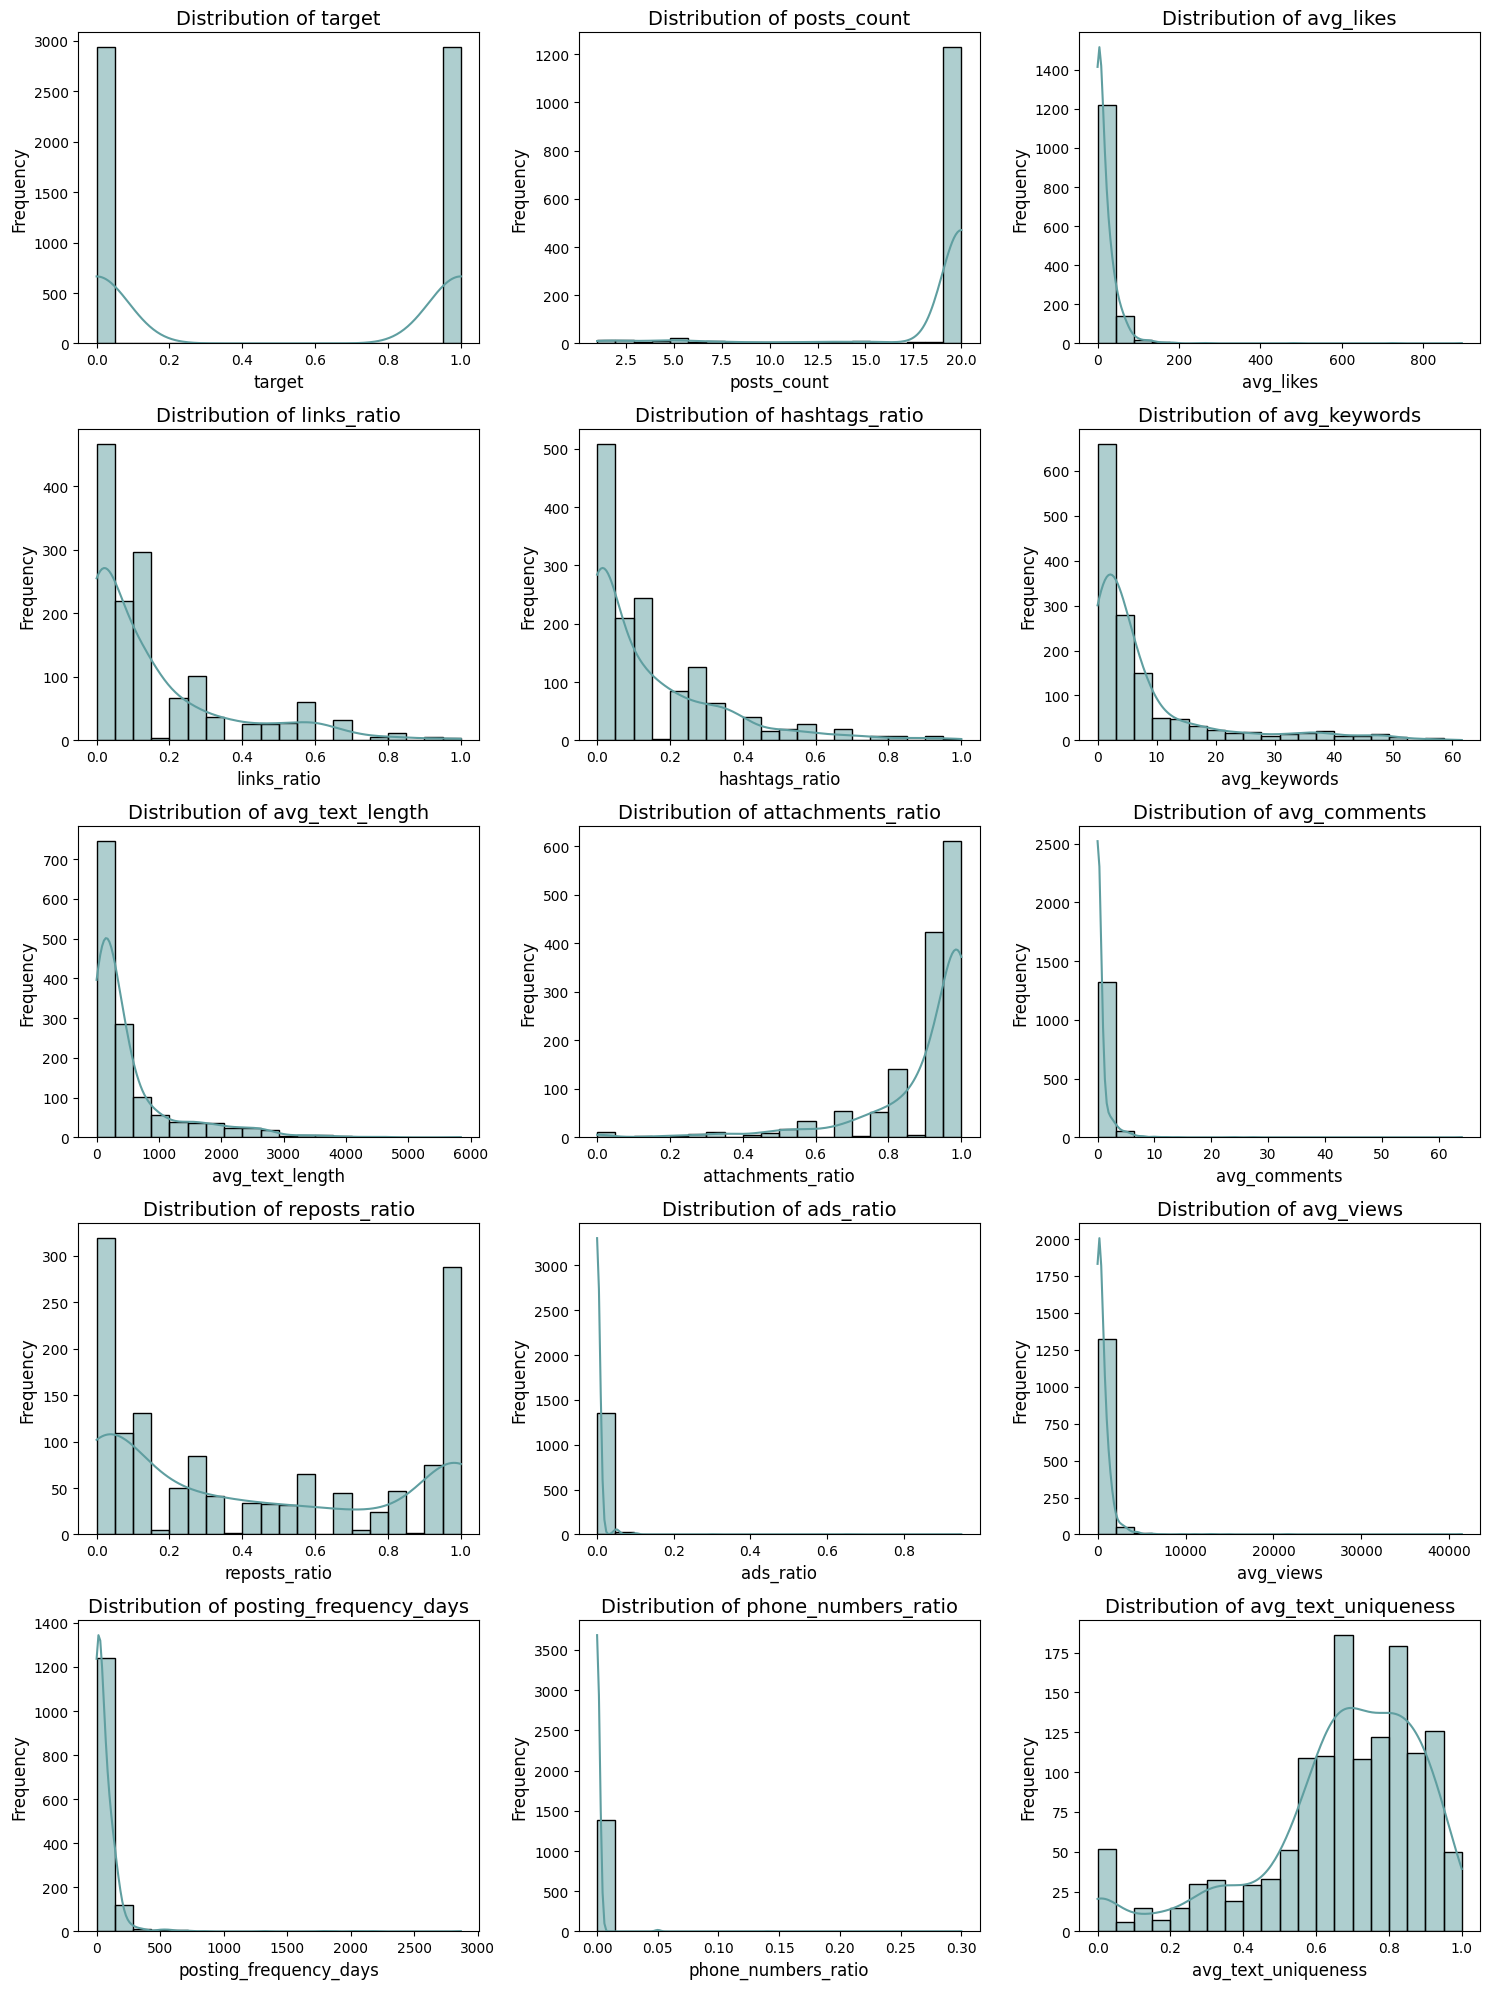

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

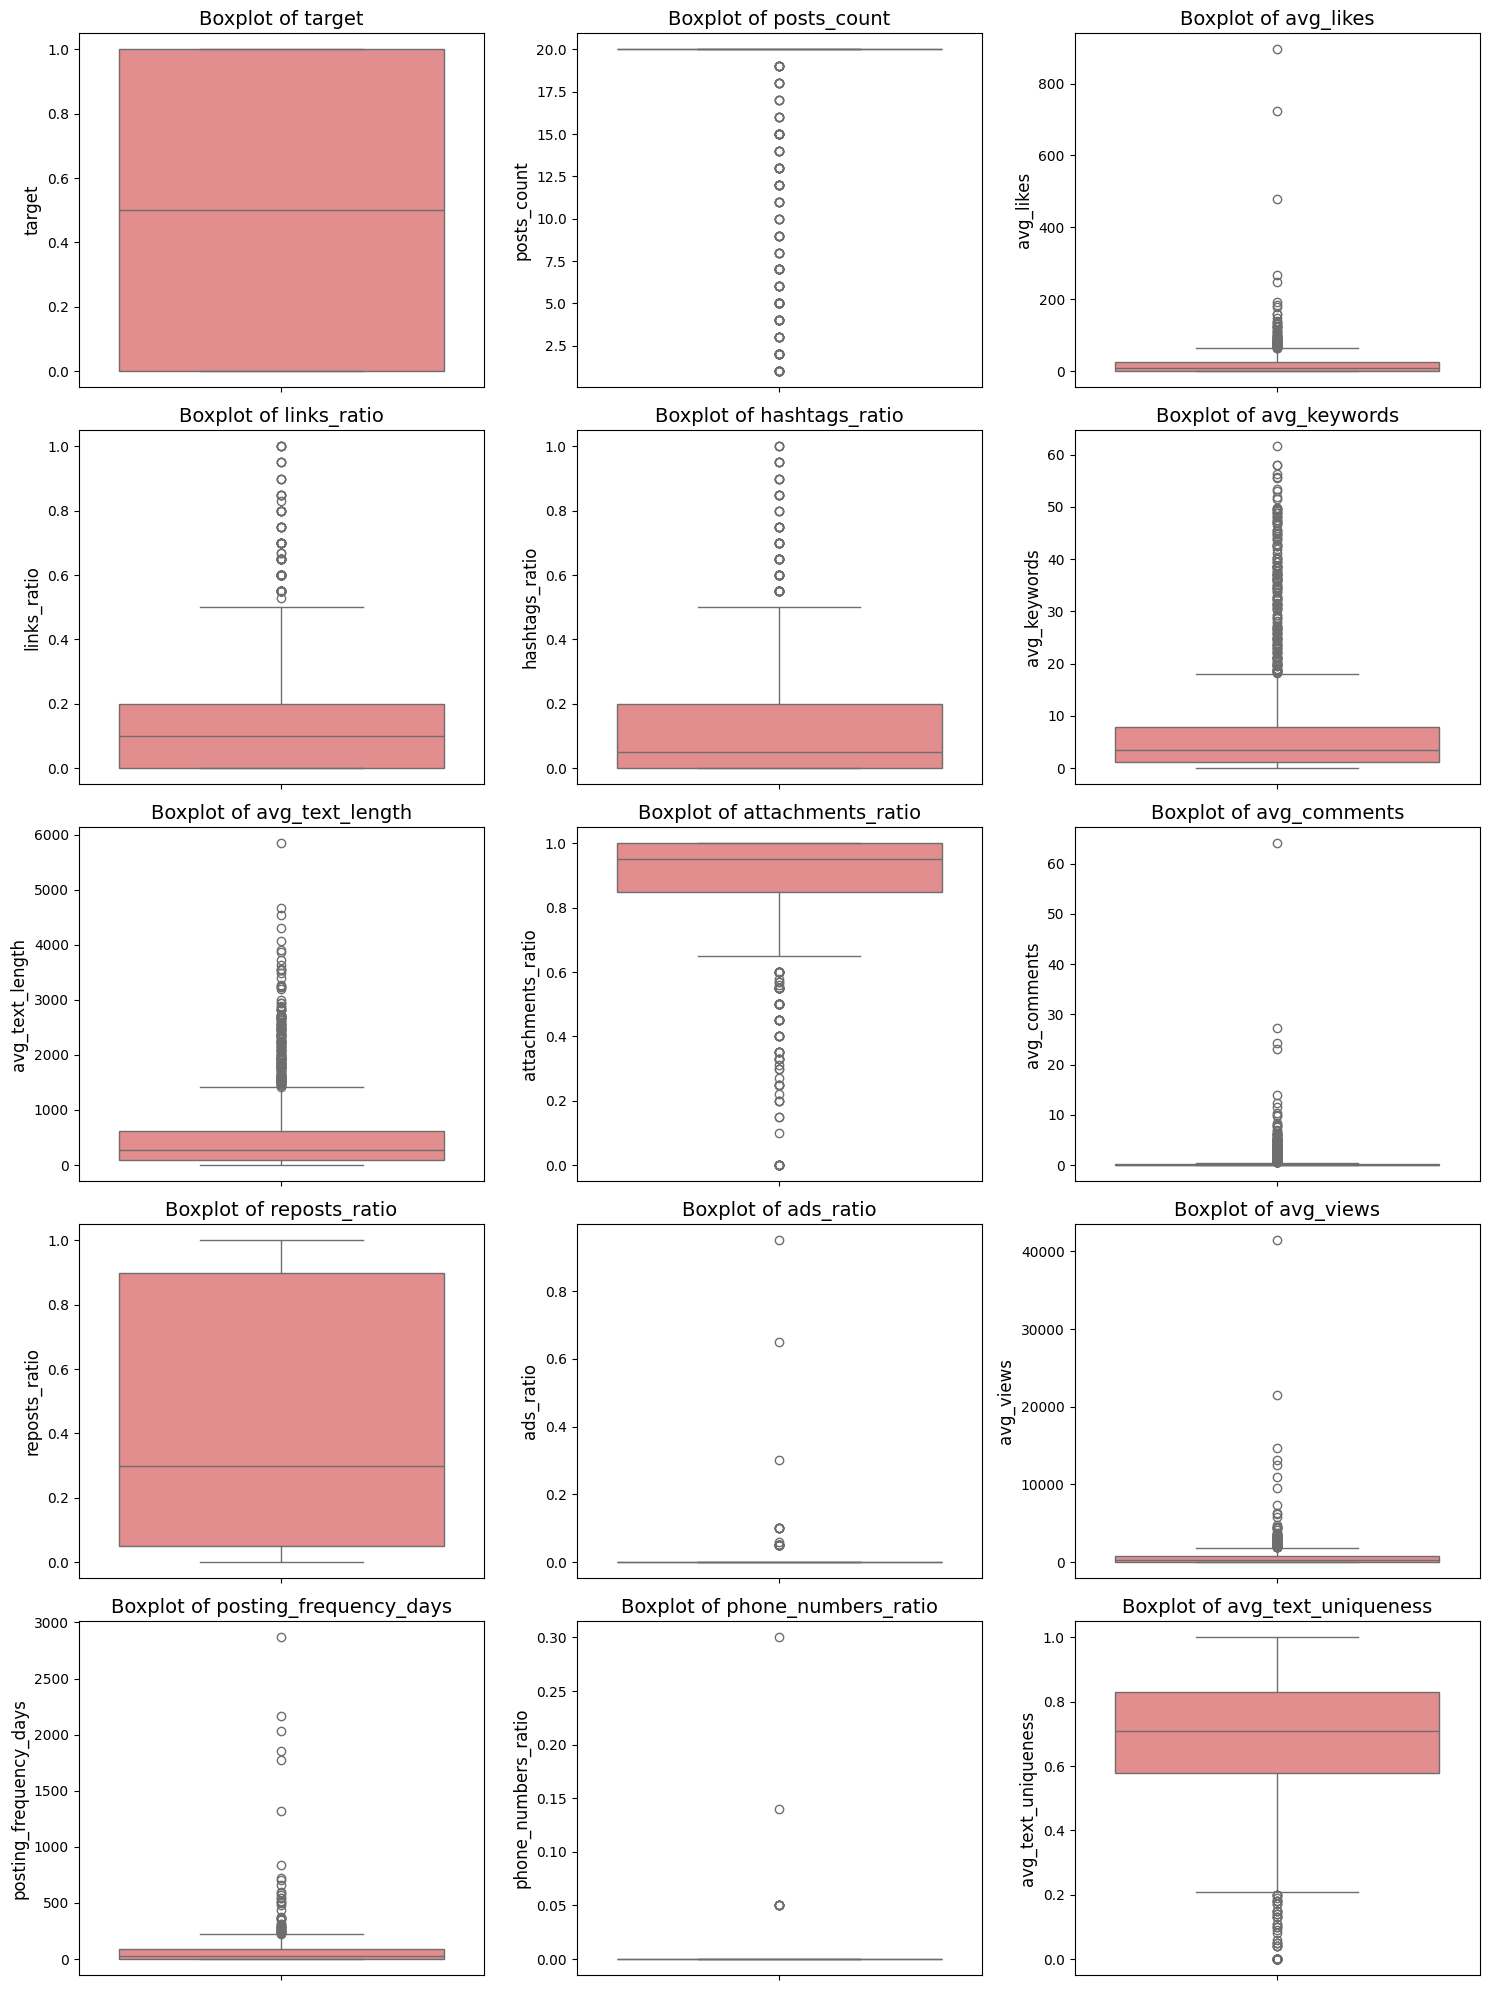

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

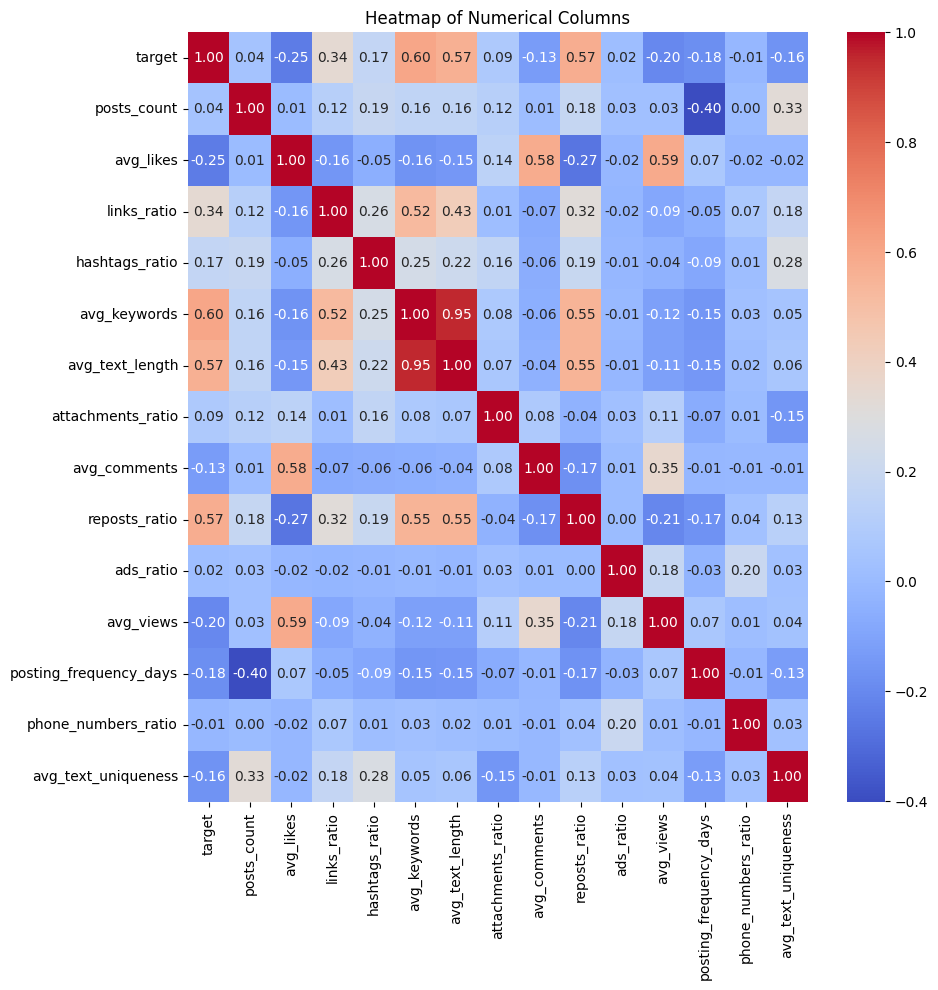

In [16]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [ ]:
# Duplicated Rows

df.dropna(inplace=True)

In [18]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [19]:
X = df.drop('target', axis=1)
y = df['target']

In [20]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Applying pca 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Model Building

In [22]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [24]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.946236559139785, 0.9605734767025089, 0.9498207885304659, 0.956989247311828, 0.942652329749104, 0.956989247311828, 0.9605734767025089, 0.9247311827956989, 0.967741935483871]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       219
           1       0.86      0.90      0.88        60

    accuracy                           0.95       279
   macro avg       0.91      0.93      0.92       279
weighted avg       0.95      0.95      0.95       279

Confusion Matrix:
 [[210   9]
 [  6  54]]


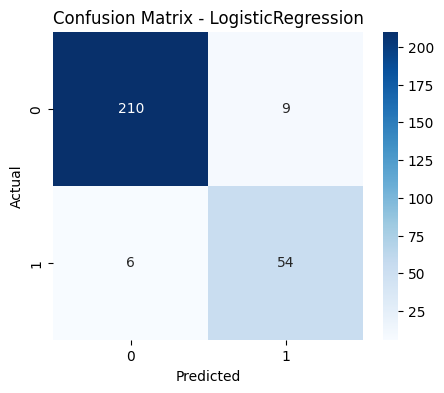

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       219
           1       0.95      0.87      0.90        60

    accuracy                           0.96       279
   macro avg       0.95      0.93      0.94       279
weighted avg       0.96      0.96      0.96       279

Confusion Matrix:
 [[216   3]
 [  8  52]]


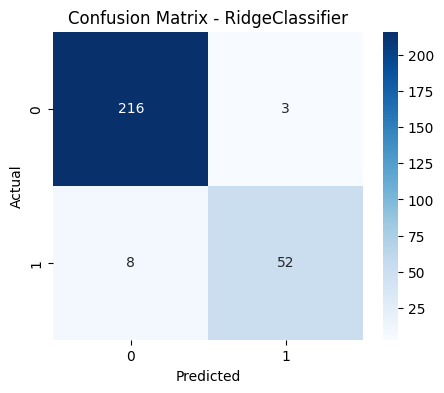

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       219
           1       0.86      0.92      0.89        60

    accuracy                           0.95       279
   macro avg       0.92      0.94      0.93       279
weighted avg       0.95      0.95      0.95       279

Confusion Matrix:
 [[210   9]
 [  5  55]]


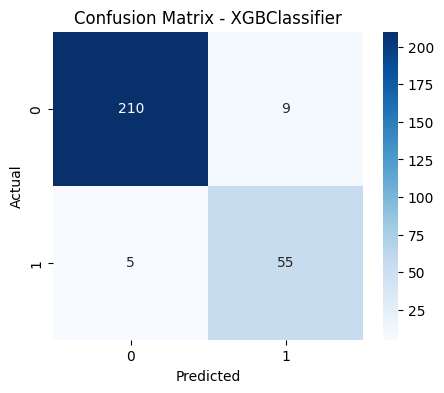

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       219
           1       0.92      0.90      0.91        60

    accuracy                           0.96       279
   macro avg       0.94      0.94      0.94       279
weighted avg       0.96      0.96      0.96       279

Confusion Matrix:
 [[214   5]
 [  6  54]]


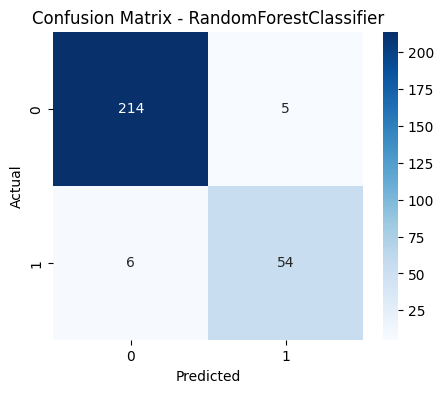

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       219
           1       0.87      0.87      0.87        60

    accuracy                           0.94       279
   macro avg       0.92      0.92      0.92       279
weighted avg       0.94      0.94      0.94       279

Confusion Matrix:
 [[211   8]
 [  8  52]]


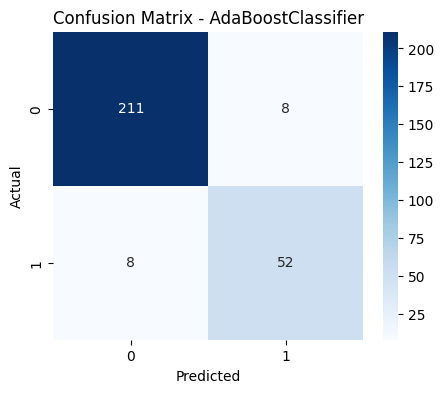

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       219
           1       0.91      0.88      0.90        60

    accuracy                           0.96       279
   macro avg       0.94      0.93      0.94       279
weighted avg       0.96      0.96      0.96       279

Confusion Matrix:
 [[214   5]
 [  7  53]]


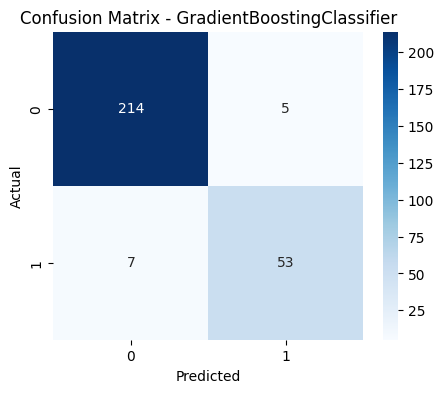

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       219
           1       0.85      0.92      0.88        60

    accuracy                           0.95       279
   macro avg       0.91      0.94      0.92       279
weighted avg       0.95      0.95      0.95       279

Confusion Matrix:
 [[209  10]
 [  5  55]]


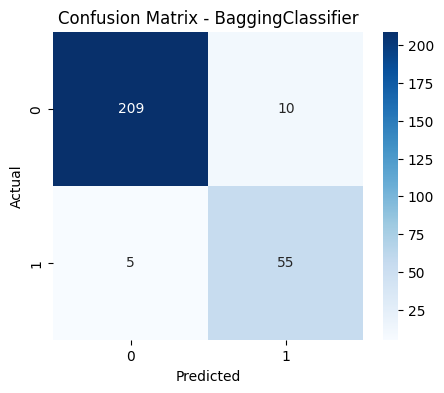

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       219
           1       0.78      0.87      0.82        60

    accuracy                           0.92       279
   macro avg       0.87      0.90      0.88       279
weighted avg       0.92      0.92      0.92       279

Confusion Matrix:
 [[204  15]
 [  8  52]]


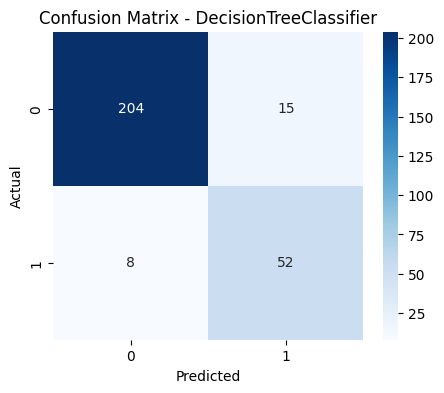

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       219
           1       0.95      0.90      0.92        60

    accuracy                           0.97       279
   macro avg       0.96      0.94      0.95       279
weighted avg       0.97      0.97      0.97       279

Confusion Matrix:
 [[216   3]
 [  6  54]]


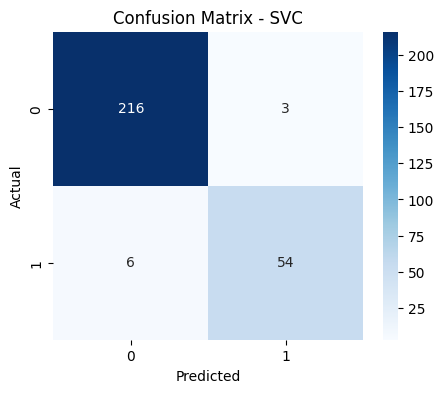

In [25]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()